In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

merc_data = pd.read_csv('./merc.csv')
merc_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [29]:
# print a summary of the numerical Mercedes used car data
merc_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [30]:
categorical_columns = ['model', 'transmission', 'fuelType']
merc_data[categorical_columns].describe()

,model,transmission,fuelType
count,13119,13119,13119
unique,27,4,4
top,C Class,Semi-Auto,Diesel
freq,3747,6848,9187


In [31]:
# see what the distinct values are for each of the categorical columns
merc_data['model'].unique()

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

In [32]:
merc_data['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [33]:
merc_data['fuelType'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype=object)

In [34]:
numeric_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
merc_num_data = merc_data[numeric_columns]
merc_num_data.head()

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0


In [35]:
corr = merc_num_data.corr()
corr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


<AxesSubplot:>

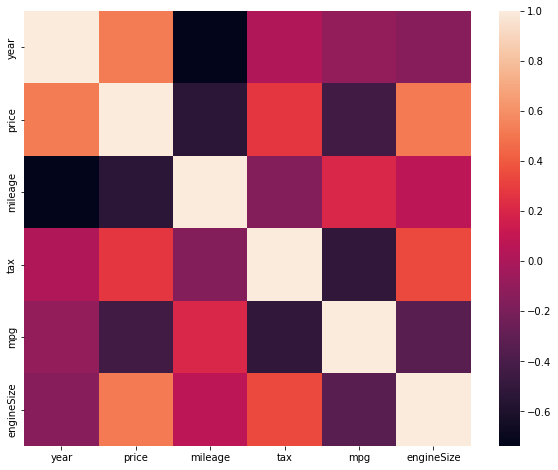

In [36]:
# Create a heatmap from the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

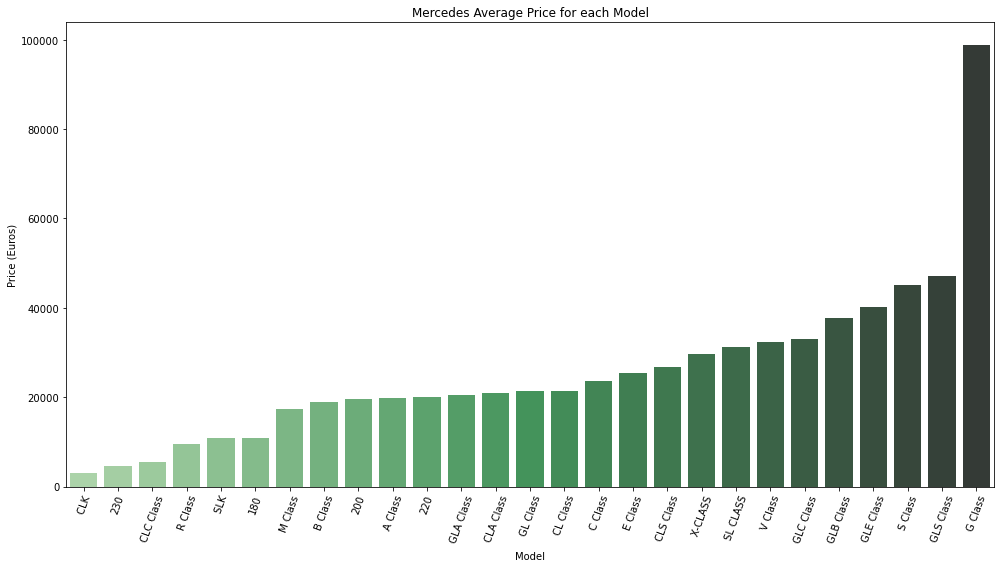

In [37]:
model_price = merc_data.groupby('model')['price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Mercedes Average Price for each Model")
pal = sns.color_palette("Greens_d", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pal)

plt.xlabel("Model")
plt.xticks(rotation=70)
plt.ylabel("Price (Euros)")
plt.tight_layout()

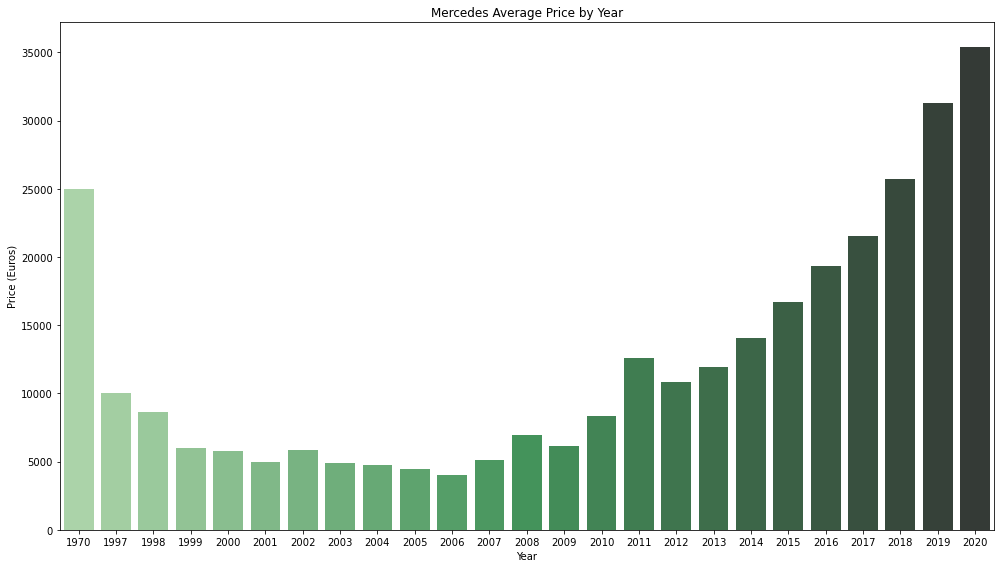

In [38]:
year_price = merc_data.groupby('year')['price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Mercedes Average Price by Year")
pal = sns.color_palette("Greens_d", len(year_price))

sns.barplot(x=year_price.index, y=year_price.values, palette=pal)

plt.xlabel("Year")
plt.ylabel("Price (Euros)")
plt.tight_layout()

<AxesSubplot:xlabel='year', ylabel='price'>

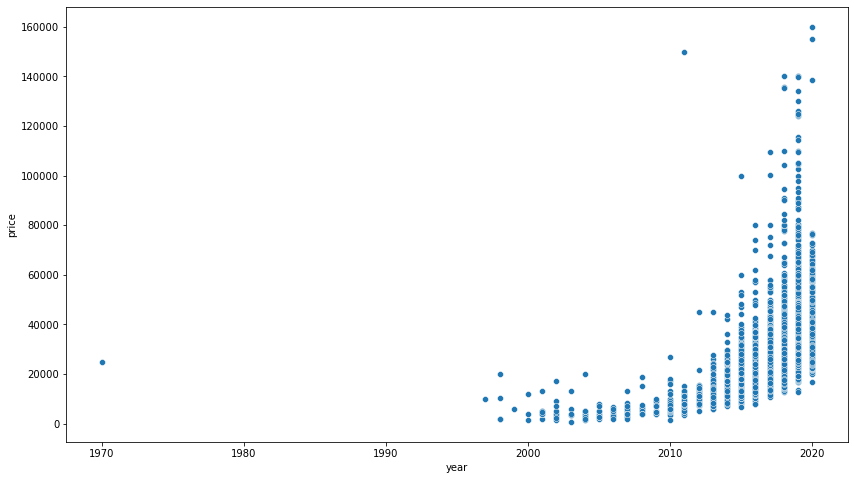

In [39]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=merc_num_data['year'], y=merc_num_data['price'])

<AxesSubplot:xlabel='engineSize', ylabel='price'>

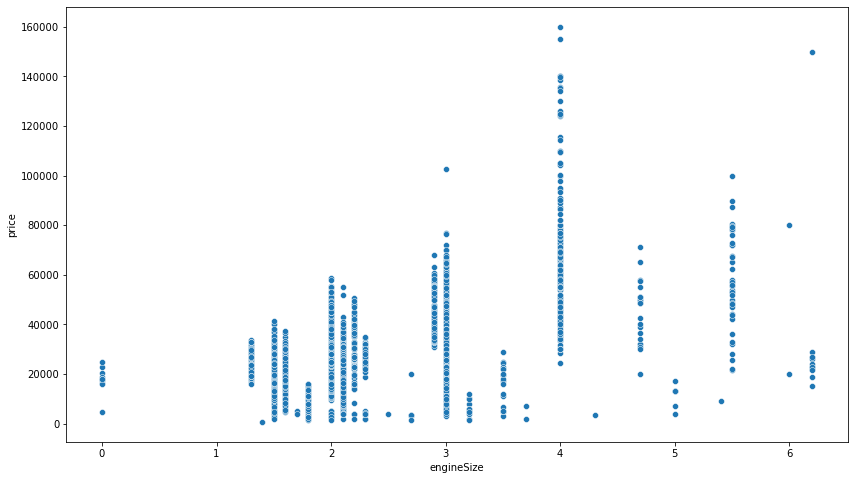

In [40]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=merc_num_data['engineSize'], y=merc_num_data['price'])

<AxesSubplot:xlabel='mileage', ylabel='price'>

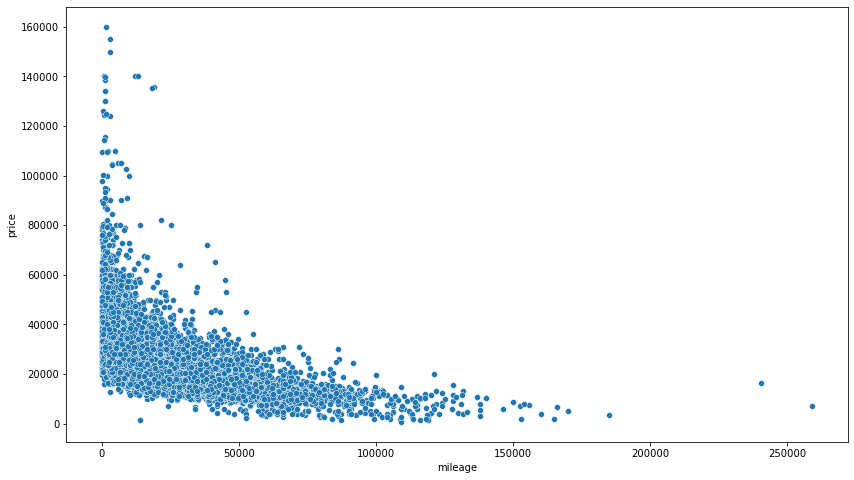

In [41]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=merc_num_data['mileage'], y=merc_num_data['price'])

<AxesSubplot:xlabel='mpg', ylabel='price'>

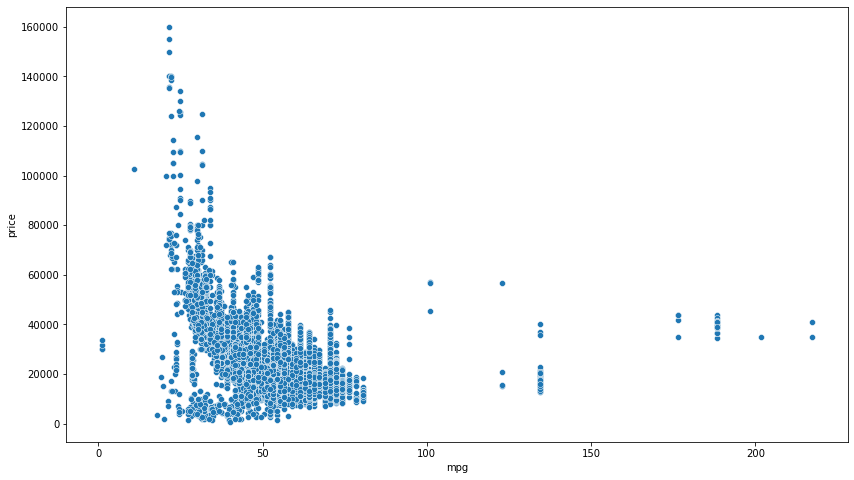

In [42]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=merc_num_data['mpg'], y=merc_num_data['price'])

<AxesSubplot:ylabel='fuelType'>

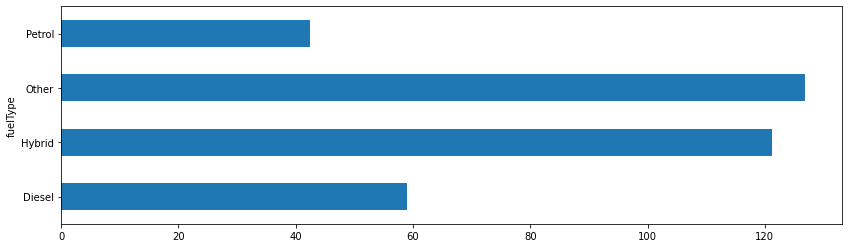

In [43]:
plt.figure(figsize=(14,4))
merc_data.groupby('fuelType')['mpg'].mean().plot.barh()

In [44]:
engine_0 = merc_data[merc_data['engineSize'] == 0.0]
engine_0

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9618,A Class,2016,17500,Automatic,29712,Diesel,20,68.9,0.0
9619,A Class,2018,20500,Automatic,13386,Petrol,145,53.3,0.0
9621,A Class,2018,18000,Automatic,18347,Diesel,150,65.7,0.0
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
9654,A Class,2016,17800,Automatic,21913,Diesel,20,68.9,0.0
10675,SL CLASS,2016,16500,Automatic,26955,Diesel,30,70.6,0.0
10710,A Class,2018,17500,Automatic,19796,Diesel,145,74.3,0.0
10739,GLA Class,2017,16000,Manual,34635,Diesel,30,64.2,0.0
10815,A Class,2017,18000,Automatic,33282,Diesel,145,68.9,0.0
11183,E Class,2018,22738,Automatic,24000,Diesel,150,61.4,0.0


<AxesSubplot:ylabel='transmission'>

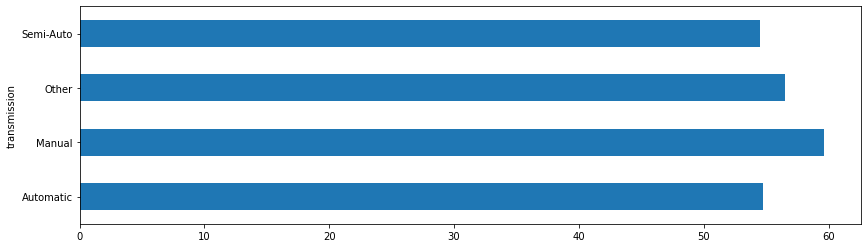

In [45]:
plt.figure(figsize=(14,4))
merc_data.groupby('transmission')['mpg'].mean().plot.barh()

### Encoding Categorical features

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply ordinal encoder to the model category feature
ordinal_encoder = OrdinalEncoder()
merc_data['model'] = ordinal_encoder.fit_transform(merc_data[['model']])

In [47]:
# Apply one-hot encoder to transmission and fuelType features
OH_encoder = OneHotEncoder(sparse=False)
oh_cols = pd.DataFrame(OH_encoder.fit_transform(merc_data[['transmission', 'fuelType']]))
oh_cols
oh_cols.columns = ['trans_0', 'trans_1', 'trans_2', 'trans_3', 'fuel_0', 'fuel_1', 'fuel_2', 'fuel_3']

# drop the original columns and add the encoded ones
merc_data = merc_data.drop(['transmission', 'fuelType'], axis=1)
merc_data = pd.concat([merc_data, oh_cols], axis=1)
merc_data

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,trans_3,fuel_0,fuel_1,fuel_2,fuel_3
0,20.0,2005,5200,63000,325,32.1,1.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,2017,34948,27000,20,61.4,2.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,19.0,2016,49948,6200,555,28.0,5.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9.0,2016,61948,16000,325,30.4,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,2016,73948,4000,325,30.1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2.0,2020,35999,500,145,55.4,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13115,1.0,2020,24699,2500,145,55.4,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13116,13.0,2019,30999,11612,145,41.5,2.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13117,7.0,2019,37990,2426,145,45.6,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Training a simple Random Forest model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Select the target variable and predictors
y = merc_data['price']
X = merc_data.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
mae

1631.447596295342

[Text(0.5, 1.0, 'Price vs. Prediction')]

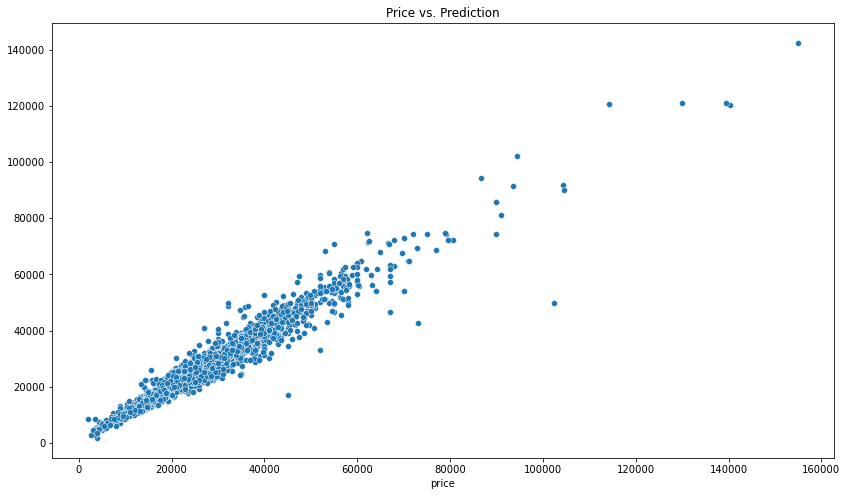

In [49]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=y_valid, y=preds).set(title='Price vs. Prediction')